<a href="https://colab.research.google.com/github/Mya-mori/Kaggle/blob/master/taitanic_%E6%9C%AA%E8%A7%A3%E6%B1%BA%20xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")

In [637]:
#各々のデータの型
df.shape

(891, 12)

In [638]:
df1.shape

(418, 11)

In [639]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [640]:
df1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
df_y = df["Survived"]

In [0]:
df_x = df.drop(["Survived", "PassengerId", "Cabin", "Ticket", "Name"], axis = 1)

In [643]:
df_x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C


In [644]:
#練習データの欠損値の確認
df_x_nan = df.isnull().sum()
df_x_nan = df_x_nan[df_x_nan > 0]
df_x_nan

Age         177
Cabin       687
Embarked      2
dtype: int64

In [0]:
#性別を数字に置き換え
df_x["Sex"] = df_x["Sex"].replace(["male", "female"], [0, 1])

[]

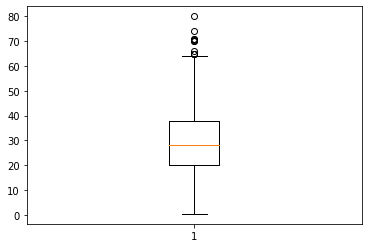

In [646]:
#Age
df_x_A = df_x["Age"].dropna()
plt.boxplot(df_x_A)
plt.plot()

In [647]:
df_x["Age"] = df_x["Age"].fillna(df_x["Age"].median())
df_x["Age"].isnull().sum()

0

In [648]:
df_x["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [649]:
df_x["Embarked"].value_counts() #value_counts()__各要素の数を数える

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [650]:
df_x["Embarked"].dropna()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

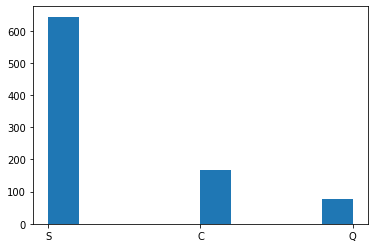

In [651]:
plt.hist(df_xn)
plt.show()

In [652]:
#欠損値をSで埋める
df_x["Embarked"] = df_x["Embarked"].fillna("S")

"""
data['Age'].fillna(20)                   #列Ageの欠損値を20で穴埋め
data['Age'].fillna(data['Age'].mean())   # 列Ageの欠損値をAgeの平均値で穴埋め
data['Age'].fillna(data['Age'].median()) # 列Ageの欠損値をAgeの中央値で穴埋め
data['Age'].fillna(data['Age'].mode())   # 列Ageの欠損値をAgeの最頻値で穴埋め
"""

"\ndata['Age'].fillna(20)                   #列Ageの欠損値を20で穴埋め\ndata['Age'].fillna(data['Age'].mean())   # 列Ageの欠損値をAgeの平均値で穴埋め\ndata['Age'].fillna(data['Age'].median()) # 列Ageの欠損値をAgeの中央値で穴埋め\ndata['Age'].fillna(data['Age'].mode())   # 列Ageの欠損値をAgeの最頻値で穴埋め\n"

In [653]:
df_x["Embarked"] = df_x["Embarked"].replace({"S", "C", "Q"}, {0,1,2})
df_x.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0


In [0]:
#家族スケールに変換
df_x["FamilyScale"] = df_x["SibSp"] + df_x["Parch"] + 1

In [0]:
df_x = df_x.drop(["SibSp", "Parch"], axis = 1)

In [656]:
df_x.head()           

,Pclass,Sex,Age,Fare,Embarked,FamilyScale
0,3,0,22.0,7.2500,0,2
1,1,1,38.0,71.2833,1,2
2,3,1,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,2
4,3,0,35.0,8.0500,0,1


In [668]:
df_x.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
FamilyScale    0
dtype: int64

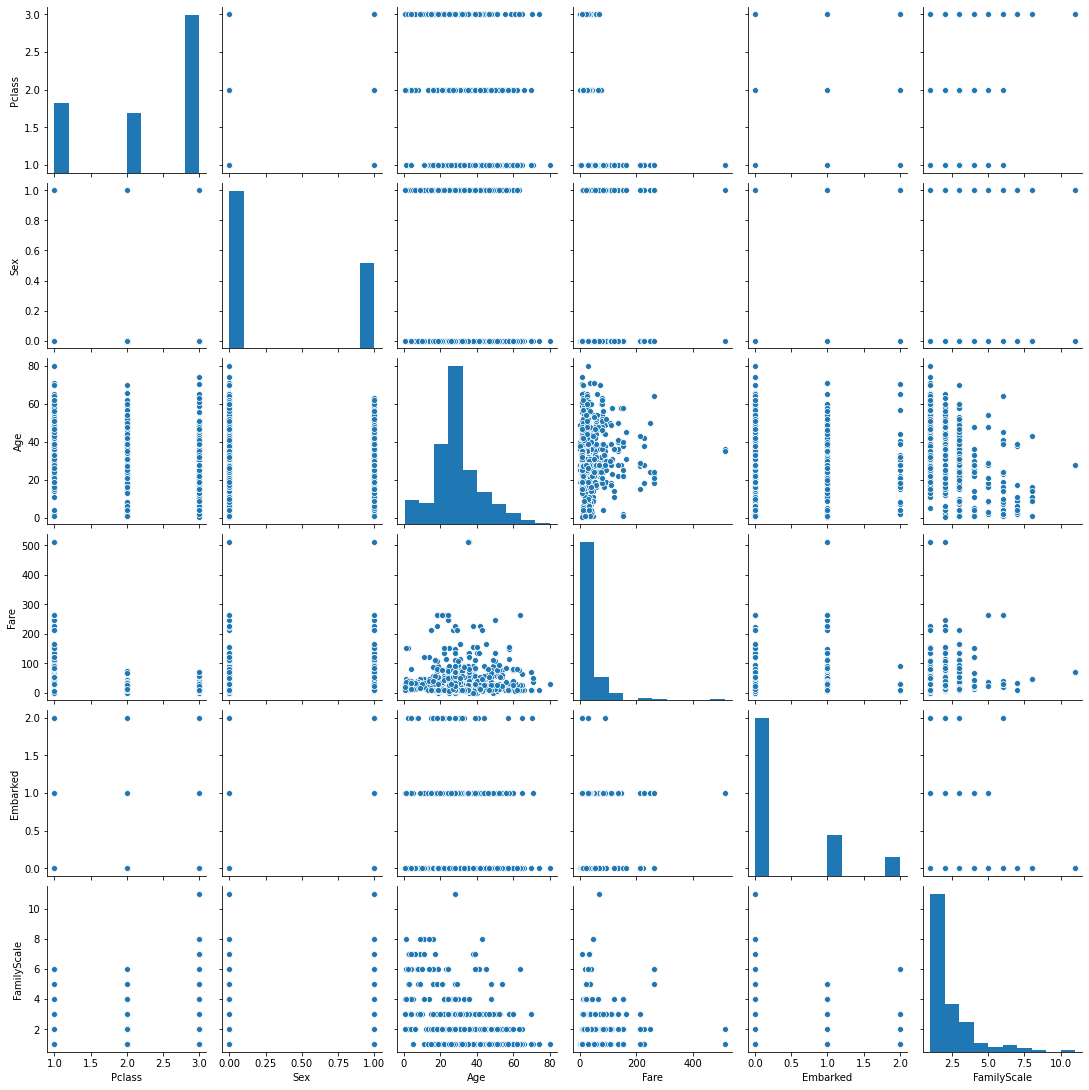

In [657]:
sns.pairplot(data = df_x)

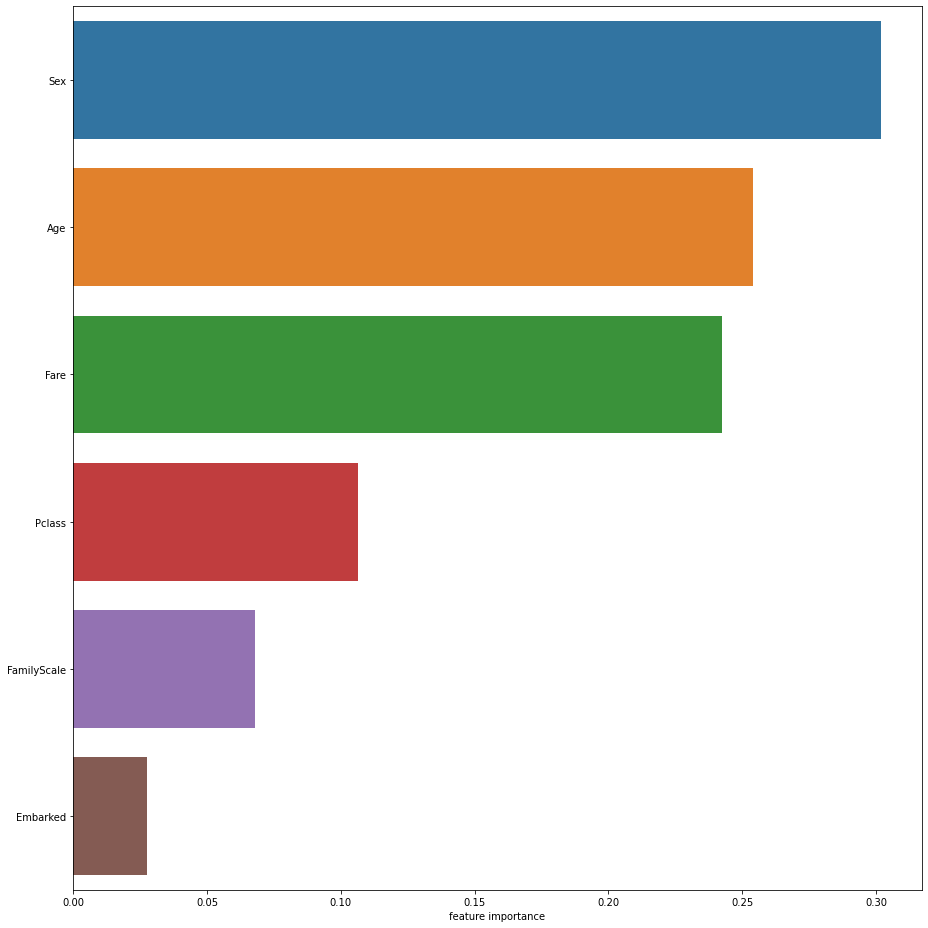

In [658]:
#ランダムフォレストで特徴量の需要量を考える
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, max_features = "auto")
rf.fit(df_x, df_y)

"""
np.argsort() ... arange the index following much importnce
"-" AAA → from big importance to small importance
"""
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize = (13, 13)) #lager graph
sns.barplot(x = rf.feature_importances_[ranking], y = df_x.columns.values[ranking],
                                        orient = "h")

ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

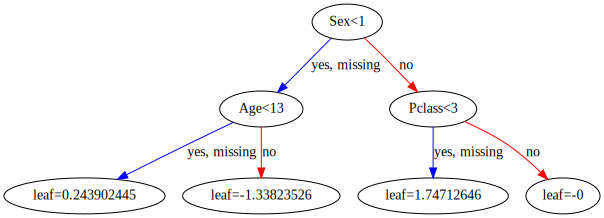

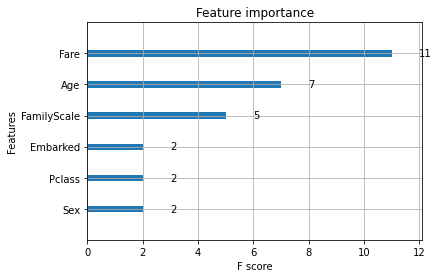

In [659]:
import xgboost as xgb

dtrain = xgb.DMatrix(data = df_x, label = df_y)
param = {
    'max_depth': 2, 
    'eta': 1, 
    'objective': 'binary:logistic'
    }
model = xgb.train(param, dtrain)
xgb.plot_importance(model)
xgb.to_graphviz(model)

In [660]:
df1.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [661]:
df1_nan = df1.isnull().sum()
df1_nan = df1_nan[df1_nan > 0]
df1_nan

Age       86
Fare       1
Cabin    327
dtype: int64

In [0]:
df1["Age"] = df1["Age"].fillna(df1["Age"].median())
df1["Fare"] = df1["Fare"].fillna(df1["Fare"].median())
df1["Embarked"] = df1["Embarked"].replace({"S", "C", "Q"}, {0, 1, 2})
df1["Sex"] = df1["Sex"].replace({"male", "female"}, {0, 1} )
df1["FamilyScale"] = df1["SibSp"] + df1["Parch"] + 1

In [0]:
df1 = df1.drop(["PassengerId", "Name", "Cabin", "Ticket", "SibSp", "Parch"], axis = 1)

In [664]:
df1.head(3)

,Pclass,Sex,Age,Fare,Embarked,FamilyScale
0,3,0,34.5,7.8292,2,1
1,3,1,47.0,7.0000,0,2
2,2,0,62.0,9.6875,2,1


In [665]:
df1.isnull().sum()    

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
FamilyScale    0
dtype: int64

In [672]:
pred = model.predict(df1)

AttributeError: ignored